In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import string

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-phone-price/Mobile phone price.csv


In [88]:
df = pd.read_csv('/kaggle/input/mobile-phone-price/Mobile phone price.csv')
df

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [90]:
# Data preprocessing
df['Storage '] = df['Storage '].str.replace('GB','')
df['RAM '] = df['RAM '].str.replace('GB','')
df['Price ($)']=df['Price ($)'].str.replace('$', '')
df['Price ($)']=df['Price ($)'].str.replace(',', '')
df['Storage '] = df['Storage '].astype(int)
df['RAM '] = df['RAM '].astype(int)
df['Price ($)']=df['Price ($)'].astype(float)
df['< 4 lenses'] = df['Camera (MP)'].str.count('\+') < 3
df['< 4 lenses'] = df['< 4 lenses'].replace({True: 'Yes', False: 'No'})
df.head(10)
        
        

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),< 4 lenses
0,Apple,iPhone 13 Pro,128,6,6.1,12 + 12 + 12,3095,999.0,Yes
1,Samsung,Galaxy S21 Ultra,256,12,6.8,108 + 10 + 10 + 12,5000,1199.0,No
2,OnePlus,9 Pro,128,8,6.7,48 + 50 + 8 + 2,4500,899.0,No
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279.0,No
4,Google,Pixel 6,128,8,6.4,50 + 12.2,4614,799.0,Yes
5,Apple,iPhone 13,128,4,6.1,12 + 12,2815,799.0,Yes
6,Samsung,Galaxy Z Flip3,256,8,6.7,12 + 12,3300,999.0,Yes
7,Xiaomi,Poco X3 Pro,128,6,6.67,48 + 8 + 2 + 2,5160,249.0,No
8,Oppo,Reno6 Pro+ 5G,128,8,6.55,50 + 13 + 16 + 2,4500,699.0,No
9,Vivo,X70 Pro+,256,12,6.78,50 + 48 + 12 + 8,4500,1199.0,No


(0.0, 1363.95)

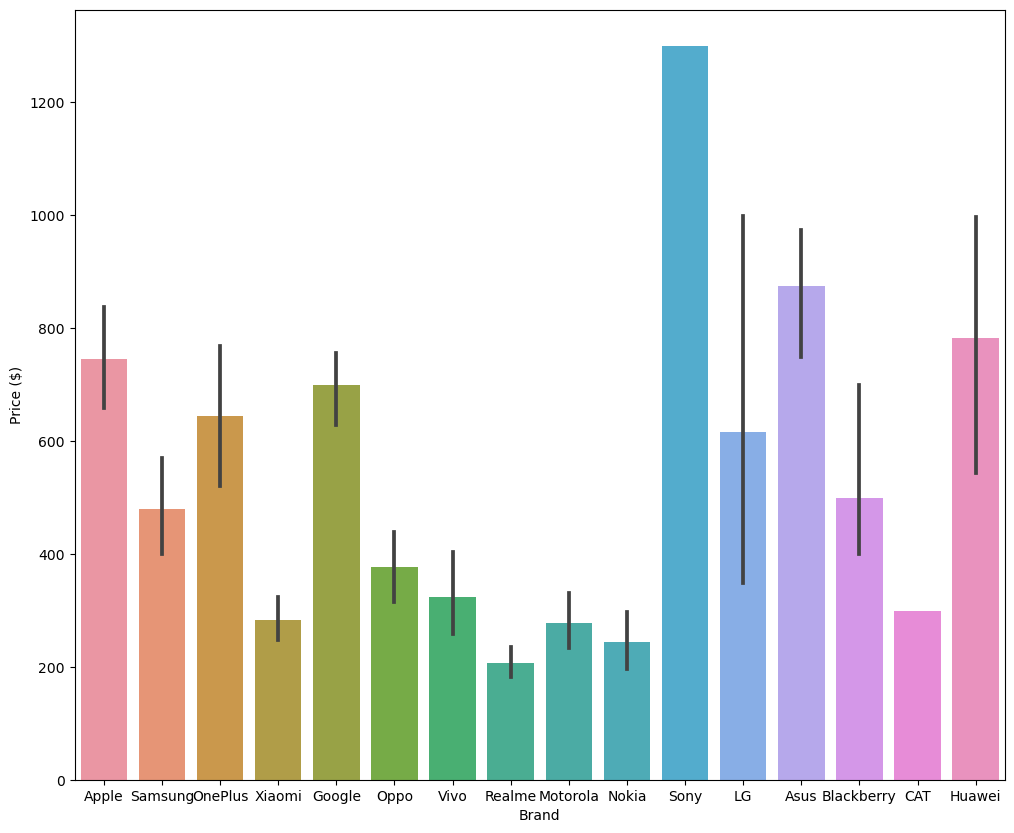

In [91]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.barplot(x='Brand', y='Price ($)', data=df)
plt.ylim(0,)

In [92]:
df.corr()['Price ($)'].sort_values()

Battery Capacity (mAh)   -0.396581
RAM                       0.637172
Storage                   0.711050
Price ($)                 1.000000
Name: Price ($), dtype: float64

(0.0, 2095.469858327641)

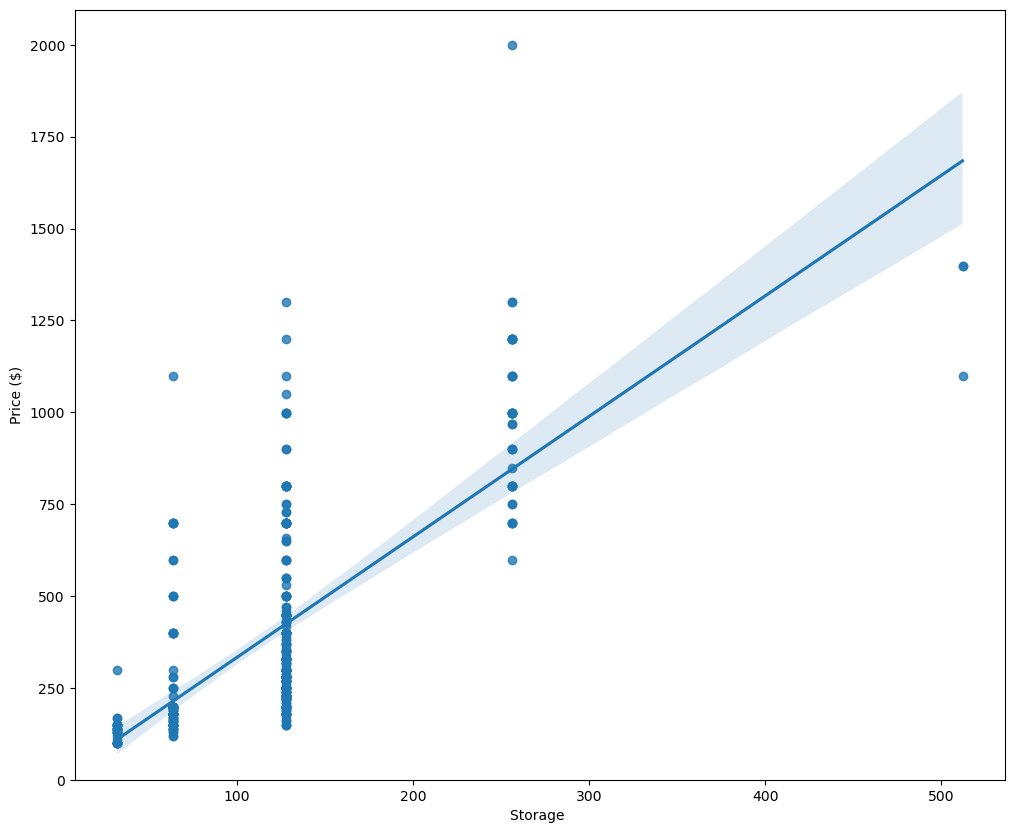

In [93]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='Storage ', y='Price ($)', data=df)
plt.ylim(0,)

(0.0, 2095.420882403576)

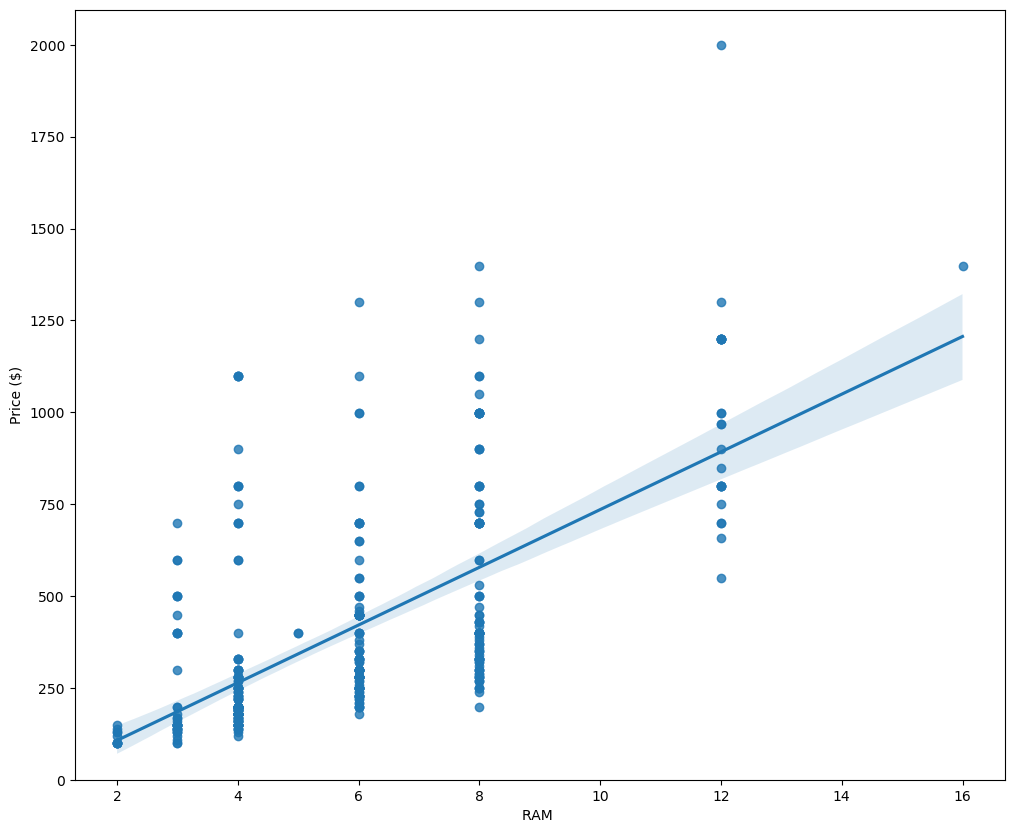

In [94]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='RAM ', y='Price ($)', data=df)
plt.ylim(0,)

<AxesSubplot:xlabel='< 4 lenses', ylabel='Price ($)'>

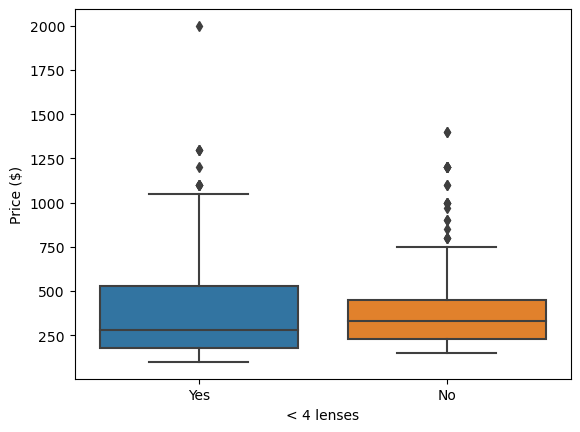

In [95]:
# To determine whether camera with less than 4 lenses or more have more price outliers.
sns.boxplot(x=df['< 4 lenses'], y=df['Price ($)'])

In [96]:
# calculate model score
X=df[['RAM ', 'Storage ']]
y=df['Price ($)']
lm = LinearRegression()
lm.fit(X,y)
lm.score(X, y)

0.5461972231759566